<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configure-the-analysis" data-toc-modified-id="Configure-the-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configure the analysis</a></span><ul class="toc-item"><li><span><a href="#Dataset-prep-parameters-:-decorrelation-and-outfile" data-toc-modified-id="Dataset-prep-parameters-:-decorrelation-and-outfile-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset prep parameters : decorrelation and outfile</a></span></li><li><span><a href="#Experiment-parameters-:-clustering-and-core-dataset" data-toc-modified-id="Experiment-parameters-:-clustering-and-core-dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Experiment parameters : clustering and core dataset</a></span></li></ul></li><li><span><a href="#Strike-Volume-Data-(4D)" data-toc-modified-id="Strike-Volume-Data-(4D)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Strike Volume Data (4D)</a></span><ul class="toc-item"><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Standard-scaler" data-toc-modified-id="Standard-scaler-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Standard scaler</a></span></li><li><span><a href="#Find-and-replaced-strongly-correlated-pairs-of-variables" data-toc-modified-id="Find-and-replaced-strongly-correlated-pairs-of-variables-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Find and replaced strongly correlated pairs of variables</a></span></li><li><span><a href="#Visualize-the-prepared-dataset" data-toc-modified-id="Visualize-the-prepared-dataset-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Visualize the prepared dataset</a></span></li><li><span><a href="#Save-the-prepared-dataset" data-toc-modified-id="Save-the-prepared-dataset-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Save the prepared dataset</a></span></li></ul></li><li><span><a href="#Find-a-clustering-solution-appropriate-to-data-topology" data-toc-modified-id="Find-a-clustering-solution-appropriate-to-data-topology-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Find a clustering solution appropriate to data topology</a></span><ul class="toc-item"><li><span><a href="#Load-the-prepared-dataset" data-toc-modified-id="Load-the-prepared-dataset-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Load the prepared dataset</a></span></li><li><span><a href="#K-Means" data-toc-modified-id="K-Means-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>K-Means</a></span></li><li><span><a href="#Gaussian-mixture-model" data-toc-modified-id="Gaussian-mixture-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gaussian mixture model</a></span></li><li><span><a href="#Tool-to-visualize-clusters-in-prepared-dataset" data-toc-modified-id="Tool-to-visualize-clusters-in-prepared-dataset-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tool to visualize clusters in prepared dataset</a></span></li></ul></li><li><span><a href="#Establish-a-new-core-dataset" data-toc-modified-id="Establish-a-new-core-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Establish a new core dataset</a></span></li><li><span><a href="#Refine-the-cluster-set-for-the-core-data" data-toc-modified-id="Refine-the-cluster-set-for-the-core-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Refine the cluster set for the core data</a></span><ul class="toc-item"><li><span><a href="#Tool-to-visualize-clusters-in-the-core-dataset" data-toc-modified-id="Tool-to-visualize-clusters-in-the-core-dataset-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Tool to visualize clusters in the core dataset</a></span></li><li><span><a href="#Apply-splits-and-outliers" data-toc-modified-id="Apply-splits-and-outliers-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Apply splits and outliers</a></span></li><li><span><a href="#Add-outliers-to-OOD-dataset" data-toc-modified-id="Add-outliers-to-OOD-dataset-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Add outliers to OOD dataset</a></span></li></ul></li><li><span><a href="#Build-and-export-the-p-Sphere-Hull" data-toc-modified-id="Build-and-export-the-p-Sphere-Hull-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Build and export the p-Sphere Hull</a></span></li><li><span><a href="#Train-regression-model-on-core-dataset" data-toc-modified-id="Train-regression-model-on-core-dataset-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train regression model on core dataset</a></span><ul class="toc-item"><li><span><a href="#Import-and-validate-the-core-dataset-and-hull" data-toc-modified-id="Import-and-validate-the-core-dataset-and-hull-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Import and validate the core dataset and hull</a></span></li><li><span><a href="#Train-a-regression--model-on-core-data" data-toc-modified-id="Train-a-regression--model-on-core-data-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Train a regression  model on core data</a></span></li><li><span><a href="#Split-OOD-data-into-interpolation-and-extrapolation-sets" data-toc-modified-id="Split-OOD-data-into-interpolation-and-extrapolation-sets-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Split OOD data into interpolation and extrapolation sets</a></span></li><li><span><a href="#Calculate-error-distributions-and-statistics" data-toc-modified-id="Calculate-error-distributions-and-statistics-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Calculate error distributions and statistics</a></span></li></ul></li></ul></div>

# OpenML Strikes Dataset Hull and Extrapolation Tests

I propose the following protocol to measure the potential for extrapolation error in a high-dimensional dataset:

__Data Preparation__

1. Apply StandardScaler to the full dataset.
2. Check for strong (Pearson's rho > 0.75) correlated pairs or groups; replace with mean + delta, or mean + s.dev. if > 3 
3. Identify the best clustering method for the full dataset. I try 3 methods: K-means, Gaussian mixtures, and Birch. For the purposes of capturing the global topology of the dataset, I consider that a better clustering method is one that tends to produce more compact clusters and fewer volumninous clusters. 

__OOD split__

4. Perform a two-sigma cut on all features, to create the core dataset X and the extrapolation dataset OOD.
4. (Alternative) Cut dataset by Isolation Forest on anomaly score

__Prepare a Hull__

5. For the core dataset, re-run the clustering method used in (1). Visualize the clusters and modify the set of clusters slightly, if needed, by removing outliers and splitting voluminous clusters. Add any rejected data / clusters to the OOD data.
5. (Alternative) Prepare convex hull.
5. (Alternative) Prepare hypercube model.

__Measure OOD Error__

6. With the core dataset, train a cross-validated, not overfit, regression model. Reserve a number of points in the held-out validation set that is approximately equal to the number of points left after the OOD split.
7. Calculate errors on the held-out validation set from X and the extrapolation dataset OOD
8. For each point, also calculate the boolean membership in the hull, and if possible (1) the distance from the hull and (2) the expected extrapolation error based on local gradents in the core dataset.

In [1]:
# import libraries

%matplotlib inline
#from IPython import display
from IPython.display import display
import importlib
import numpy as np
import pandas as pd
import math as m
import itertools
import pickle
# CPU time
from time import time
# Plotting
import pylab as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D
# Interaction
from ipywidgets import interact, interactive, fixed, interact_manual, interactive_output
import ipywidgets as widgets
# Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, Birch
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE, LocallyLinearEmbedding
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# Statistics
from scipy.stats import ks_2samp

In [2]:
# import PSphereHull package from local folder
import os
import sys
#module_path = 'C:\\Users\\bemathiesen\\Altran\\git\\proj_PSphereHull\\src\\'
module_path = 'C:\\Users\\bemathiesen\\Altran\\git\\pspherehull\\src\\'
if module_path not in sys.path:
    sys.path.append(module_path)
# PSphereHull modules
from PSphereHull import refine_cluster_set as rcs
from PSphereHull import psphere_hull as psh
from PSphereHull import basic_functions as bf

print(sys.version)

3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


## Configure the analysis

The variables set here represent user choices; the rest of the notebook should be fully automated in order to enable consistent analysis of multiple datasets

__NOTE:__ Please copy the notebook and source datafile to a folder outside the git before running your own experiments.

### Dataset prep parameters : decorrelation and outfile

In [3]:

# Maximum number of pairwise scatter plots to display for highly correlated variable pairs
strong_correlation_threshold = 0.75
max_correlation_plots = 4

# Create an output folder and save datasets and figures. 
# If you set this to true, please use a copy of the notebook outside the git.
write_outputs = False

# Filename of the saved dataset after scaling and de-correlating
output_folder = './strike_rf_k20/'
if write_outputs:
    if not os.path.exists(output_folder):
        os.mkdir(output_folder)
figure_prefix = 'strike_'
prepared_outfile = 'prepared_dataset_strike.csv'

### Experiment parameters : clustering and core dataset

In [4]:

# Number of clusters to find for p-sphere hull and random seed for repeatability
n_clusters = 20
random_seed = 42

# Half-width of hypercube that defines "core" dataset (scaled data, so std. deviations)
core_half_width = 1.6

# Regression model: rf for Random Forest, gb for Gradient Boosting, svm for Support Vector Machine
regression_model = 'rf'

## Strike Volume Data (4D)

This dataset has 625 points and 4 continuous explanatory variables.
2 other explanatory variables are dropped, an integer country code and the year.

Dataset source: https://www.openml.org/d/549

###  Load dataset

In [5]:
# Read and prepare server load dataset

df_raw = pd.read_csv('../data/strikes.csv', sep=',').applymap(pd.to_numeric)
print('Original file shape')
print(df_raw.shape)

# get target variable
target = df_raw['strike_volume'].values
target_strike = target
df_raw.drop(['country_code','year','strike_volume'], axis=1, inplace=True)

print('After removing target variable and 2 categorical variables')
print(df_raw.shape)
data_strike = df_raw
data_strike.head()

Original file shape
(625, 7)
After removing target variable and 2 categorical variables
(625, 4)


,unemployment,inflation,parliamentary_representation,union_centralization
0,1.3,19.8,43.0,0.375
1,2.2,17.2,43.0,0.375
2,2.5,4.3,43.0,0.375
3,1.7,0.7,47.0,0.375
4,1.4,2.0,38.5,0.375


### Standard scaler

Convert all features to mean zero and standard deviation units.

In [6]:
ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data_strike), columns=data_strike.columns)
data_scaled.head()

,unemployment,inflation,parliamentary_representation,union_centralization
0,-0.743921,2.995444,0.163811,-0.259655
1,-0.446997,2.432820,0.163811,-0.259655
2,-0.348022,-0.358660,0.163811,-0.259655
3,-0.611955,-1.137677,0.468167,-0.259655
4,-0.710930,-0.856365,-0.178588,-0.259655


### Find and replaced strongly correlated pairs of variables

Text(0, 0.5, 'Number of feature pairs')

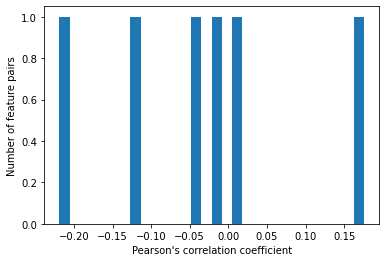

In [7]:
corr_df = data_scaled.corr().values
rhos = np.tril(corr_df, k=-1).flatten()
rhos_rows = np.where(rhos != 0.)[0]
plt.hist(rhos[rhos_rows], bins=30)
plt.xlabel("Pearson's correlation coefficient")
plt.ylabel("Number of feature pairs")

In [8]:
# Find and display up to four correlated pairs of variables

corr_pairs = np.where(np.tril(corr_df, k=-1) >= strong_correlation_threshold)
print(corr_pairs)

fig = plt.figure(figsize=(15,3.5))
npairs = len(corr_pairs[0])
for j in range(min(max_correlation_plots,npairs)):
    col1 = data_scaled.columns[corr_pairs[0][j]]
    col2 = data_scaled.columns[corr_pairs[1][j]]
    ax = fig.add_subplot(101 + max_correlation_plots * 10 + j)
    ax.scatter(data_scaled[col1], data_scaled[col2], s=4)
    corr = np.corrcoef(data_scaled[col1], data_scaled[col2], rowvar=False)
    ax.set_xlabel(col1 + ' [' + str(corr_pairs[0][j]) + ']')
    ax.set_ylabel(col2 + ' [' + str(corr_pairs[1][j]) + ']')
    ax.set_title('rho = '+str(corr[0,1])[:5])
    
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'dataset_full_correlated_features.png')

(array([], dtype=int64), array([], dtype=int64))


<Figure size 1080x252 with 0 Axes>

In [9]:
# This part has to be done by hand, because sometimes we might find triples or larger groups of correlated features

# # Make a copy
data = pd.DataFrame(data_scaled)

# # Pair one has indices 3,4
# data['sread_swrite_mean'] = 0.5 * (data['sread'] + data['swrite'])
# data['sread_swrite_delta'] = data['sread'] - data['swrite']

# # Pair two has indices 5,6
# data['exec_fork_mean'] = 0.5 * (data['exec'] + data['fork'])
# data['exec_fork_delta'] = data['exec'] - data['fork']

# # Drop original columns
# data.drop(['sread','swrite','exec','fork'], axis=1, inplace=True)
# data.head()

### Visualize the prepared dataset

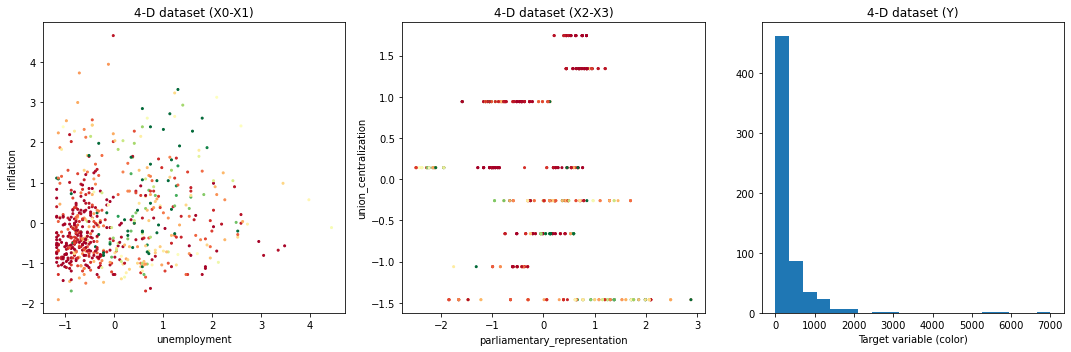

In [10]:
# plot the dataset as two 3D projections and the target variable
colormap = cm.RdYlGn #or any other colormap
normalize = colors.Normalize(vmin=np.min(target), vmax=1000)
s_map = cm.ScalarMappable(norm=normalize, cmap=colormap)
# Plot 2 2D projections of the data
fig = plt.figure(figsize=(15,5))

ax = fig.add_subplot(131)
ax.set_xlabel(data.columns[0])
ax.set_ylabel(data.columns[1])
ax.set_title('4-D dataset (X0-X1)')
ax.scatter(data.values[:,0],data.values[:,1], s=4, 
           c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(132)
ax.set_xlabel(data.columns[2])
ax.set_ylabel(data.columns[3])
ax.set_title('4-D dataset (X2-X3)')
ax.scatter(data.values[:,2],data.values[:,3], s=4,
          c=target, cmap=colormap, norm=normalize)

ax = fig.add_subplot(133)
# vals, bins = np.histogram(target, bins=50)
# bar_colors = s_map.to_rgba(bins)
# ax.bar(bins[:-1], vals, align='edge', width=0.2, color=bar_colors[:-1])
ax.hist(target,bins=20)
ax.set_xlabel('Target variable (color)')
ax.set_title('4-D dataset (Y)')
#ax.set_xlim((0,20))

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'dataset_full_with_target.png')

### Save the prepared dataset

In [11]:
print(data.shape)
if write_outputs:
    data.to_csv(output_folder + prepared_outfile, sep=';', index=False)
    np.savetxt(output_folder + 'target_' + prepared_outfile, target, delimiter=';')

(625, 4)


## Find a clustering solution appropriate to data topology

K-Means and Gaussian Mixtures are both adequate starting points.

Gaussian mixtures is better able to model subdomains with compact dimensions ("fingers") that lie close together.

Birch could also be a good candidate, but the current version of PSphereHull does not handle well the case where some clusters have only 1 data point. Some refactoring is needed to correctly handle this case.

### Load the prepared dataset

In [12]:
# Load dataset and rename

if write_outputs:
    scaled_df = pd.read_csv(output_folder + prepared_outfile, sep=';', index_col=False)
else:
    scaled_df = data

scaled_data = scaled_df.values
print(scaled_data.shape)
scaled_df.head(5)

(625, 4)


,unemployment,inflation,parliamentary_representation,union_centralization
0,-0.743921,2.995444,0.163811,-0.259655
1,-0.446997,2.432820,0.163811,-0.259655
2,-0.348022,-0.358660,0.163811,-0.259655
3,-0.611955,-1.137677,0.468167,-0.259655
4,-0.710930,-0.856365,-0.178588,-0.259655


### K-Means

In [13]:
# K-Means and p-cylinder dataframe 

km = KMeans(n_clusters, random_state=random_seed)
km.fit(scaled_data)
km_spheres_df = rcs.describe_cluster_pspheres(scaled_data, km.labels_, km.cluster_centers_)

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


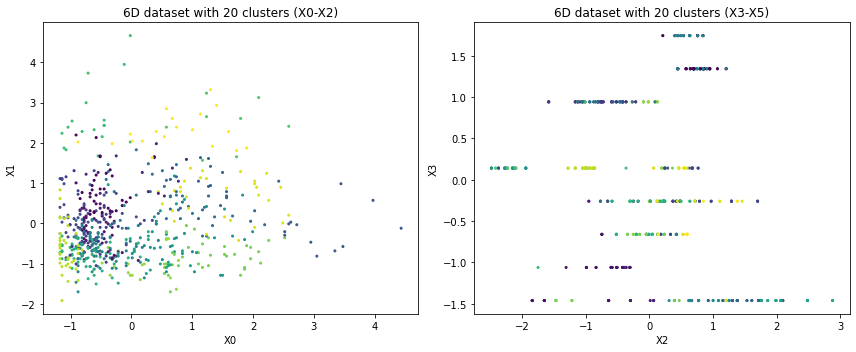

In [14]:
# 2D plots where color indicates cluster membership
fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_title('6D dataset with ' + str(n_clusters) + ' clusters (X0-X2)')
ax.scatter(scaled_data[:,0], scaled_data[:,1], s=4, c=km.labels_)
ax = fig.add_subplot(122)
ax.set_xlabel('X2')
ax.set_ylabel('X3')
ax.set_title('6D dataset with ' + str(n_clusters) + ' clusters (X3-X5)')
ax.scatter(scaled_data[:,2], scaled_data[:,3], s=4, c=km.labels_)
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'dataset_full_km'+str(n_clusters)+'.png') 

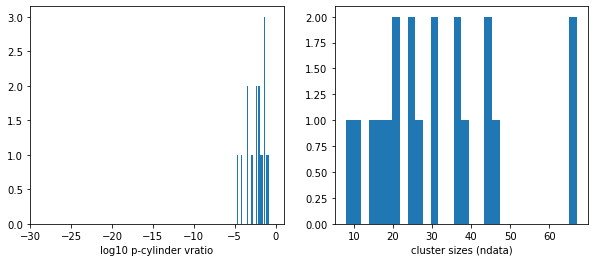

In [15]:
# histograms of p-cylinder volume and cluster ndata

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
b, v, p = ax1.hist(np.log10(km_spheres_df.ps_vratio.values), bins=30)
ax1.set_xlabel('log10 p-cylinder vratio')
ax1.set_xlim((-30,1))
ax2 = fig.add_subplot(122)
b, v, p = ax2.hist(km_spheres_df.ndata.values, bins=30)
ax2.set_xlabel('cluster sizes (ndata)')
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'km'+str(n_clusters)+'_histograms.png')

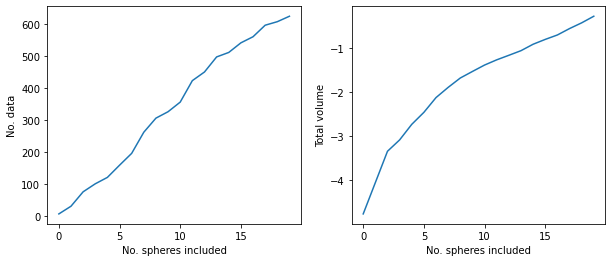

In [16]:
# Plot cumulative distribution

sphere_order = km_spheres_df.ps_vratio.values.argsort()
cum_volume = np.log10(np.cumsum(km_spheres_df.ps_vratio[sphere_order]))
cum_ndata =  np.cumsum(km_spheres_df.ndata[sphere_order])
nspheres = list(range(km_spheres_df.shape[0]))

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(nspheres, cum_ndata)
ax1.set_xlabel('No. spheres included')
ax1.set_ylabel('No. data')
ax2 = fig.add_subplot(122)
ax2.plot(nspheres, cum_volume)
ax2.set_xlabel('No. spheres included')
ax2.set_ylabel('Total volume')
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'km'+str(n_clusters)+'_cumdist.png')

### Gaussian mixture model

In [17]:
# Gaussian mixtures

gm = GaussianMixture(n_clusters, random_state=random_seed)
gm_labels = gm.fit_predict(scaled_data)

gm_spheres_df = rcs.describe_cluster_pspheres(scaled_data, gm_labels, gm.means_)

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


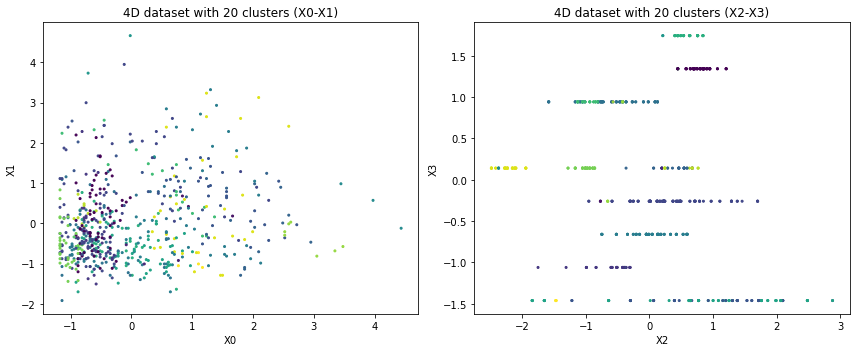

In [18]:
# 3D plots where color indicates cluster membership 

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(121)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_title('4D dataset with ' + str(n_clusters) + ' clusters (X0-X1)')
ax.scatter(scaled_data[:,0], scaled_data[:,1], s=4, c=gm_labels)
ax = fig.add_subplot(122)
ax.set_xlabel('X2')
ax.set_ylabel('X3')
ax.set_title('4D dataset with ' + str(n_clusters) + ' clusters (X2-X3)')
ax.scatter(scaled_data[:,2], scaled_data[:,3], s=4, c=gm_labels)
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'dataset_full_gm'+str(n_clusters)+'.png') 

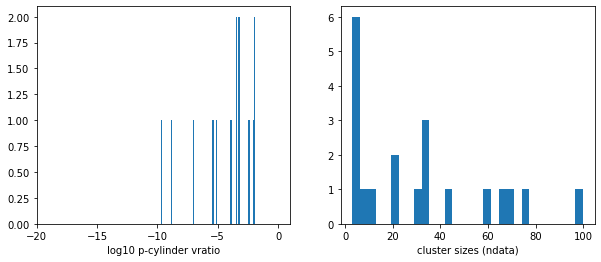

In [19]:
# histograms of p-cylinder volume and cluster ndata

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
b, v, p = ax1.hist(np.log10(gm_spheres_df.ps_vratio.values), bins=100)
ax1.set_xlabel('log10 p-cylinder vratio')
ax1.set_xlim(-20,1)
ax2 = fig.add_subplot(122)
b, v, p = ax2.hist(gm_spheres_df.ndata.values, bins=30)
ax2.set_xlabel('cluster sizes (ndata)')
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'gm'+str(n_clusters)+'_histograms.png') 

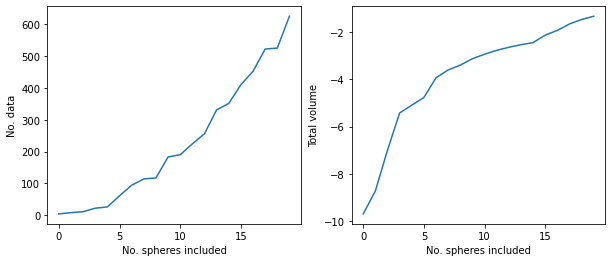

In [20]:
# Plot cumulative distribution

sphere_order = gm_spheres_df.ps_vratio.values.argsort()
cum_volume = np.log10(np.cumsum(gm_spheres_df.ps_vratio[sphere_order]))
cum_ndata =  np.cumsum(gm_spheres_df.ndata[sphere_order])
nspheres = list(range(gm_spheres_df.shape[0]))

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.plot(nspheres, cum_ndata)
ax1.set_xlabel('No. spheres included')
ax1.set_ylabel('No. data')
ax2 = fig.add_subplot(122)
ax2.plot(nspheres, cum_volume)
ax2.set_xlabel('No. spheres included')
ax2.set_ylabel('Total volume')
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'gm'+str(n_clusters)+'_cumdist.png') 

### Tool to visualize clusters in prepared dataset

Note: to visualize KMeans or GMM clusters, you need to modify the display_cluster() function by hand.

In [21]:
# Define display_cluster() function for widget
# change 'method' inside function and redefine to see different clustering methods

cols_to_keep = data.columns.tolist()
def display_cluster_1(cluster_id):
    method = 'gm'
    if method == 'km':
        ic_colors = np.where(km.labels_ == cluster_id, 'red', 'grey')
        ic_sizes = np.where(km.labels_ == cluster_id, 9, 1)
    else:
        ic_colors = np.where(gm_labels == cluster_id, 'red', 'grey')
        ic_sizes = np.where(gm_labels == cluster_id, 9, 1)
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
    ax.set_xlabel(cols_to_keep[0])
    ax.set_ylabel(cols_to_keep[1])
    ax.set_title('Cluster '+str(cluster_id))
    ax.scatter(scaled_data[:,0],scaled_data[:,1], s=ic_sizes,
              c=ic_colors)
    ax = fig.add_subplot(122)
    ax.set_xlabel(cols_to_keep[2])
    ax.set_ylabel(cols_to_keep[3])
    ax.set_title('Method = '+method)
    ax.scatter(scaled_data[:,2],scaled_data[:,3], s=ic_sizes,
              c=ic_colors)
    fig.tight_layout()
    plt.show()
    return

In [22]:
inbox = widgets.BoundedIntText(value=0, min=0, max=n_clusters-1, description='Cluster ID:')
ui = widgets.HBox([inbox])
# cluster_id is the name of an argument to f()
out = widgets.interactive_output(display_cluster_1, {'cluster_id': inbox})
display(ui,out);

Output()

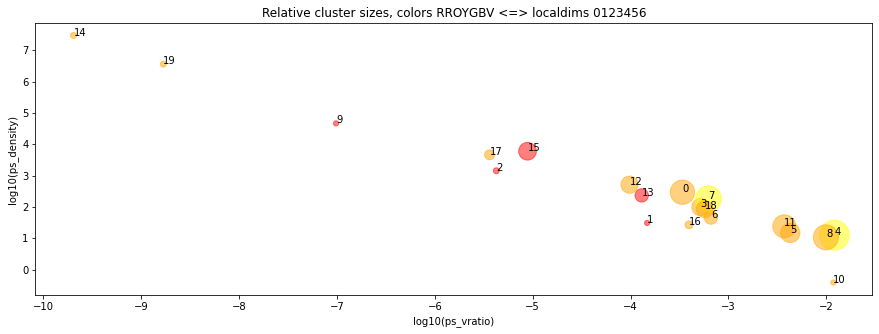

In [23]:
rcs.plot_cluster_pspheres(gm_spheres_df, 12, 'ps_vratio', 'ps_density')

## Establish a new core dataset

We choose GMM as the best clustering model, since it seems to follow the cluster topology better

Reject data outside upper limit in each feature axis

(625, 4)


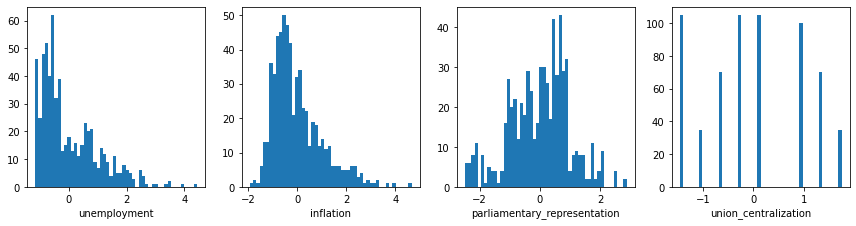

In [24]:
print(scaled_data.shape)
n_features = scaled_data.shape[1]
fig = plt.figure(figsize=(12,9))
for icol in range(n_features):
    ax = fig.add_subplot(3,4,1+icol)
    ax.hist(scaled_data[:,icol], bins=50)
    ax.set_xlabel(data.columns[icol])
#    ax.set_xlim((-2,5))
#    ax.set_ylim((0,800))
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'feature_distributions.png')

In [25]:
upper_limits = np.ones(12, dtype='float') * core_half_width
lower_limits = np.ones(12, dtype='float') * -core_half_width

In [26]:
# Split data into "core" and "extrap"

def point_in_hypercube(vector, hc_min, hc_max):
    """
    Test whether vector is inside the hypercube bounds defined by hc_min and hc_max.
    Returns True if inside.
    """
    outside = np.ones(vector.shape[0])
    for i, val in enumerate(vector):
        if hc_min[i] <= val <= hc_max[i]:
            # flip bit for inside
            outside[i] = 0
    return not np.any(outside) 

idx_in_core = [point_in_hypercube(scaled_data[i,:], lower_limits, upper_limits) for i in range(scaled_data.shape[0])]

core_data_idx = np.where(idx_in_core)[0]
extrap_data_idx = np.where(np.logical_not(idx_in_core))[0]
core_data = scaled_data[core_data_idx,:]
core_target = target[core_data_idx]
extrap_data = scaled_data[extrap_data_idx,:]
extrap_target = target[extrap_data_idx]
print(core_data.shape)
print(core_target.shape)
print(extrap_data.shape)
print(extrap_target.shape)

(431, 4)
(431,)
(194, 4)
(194,)


In [27]:
# Re-run clustering pipeline on core dataset
gm = GaussianMixture(n_clusters, random_state=random_seed)
gm_labels = gm.fit_predict(core_data)
gm_spheres_df = rcs.describe_cluster_pspheres(core_data, gm_labels, gm.means_)

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


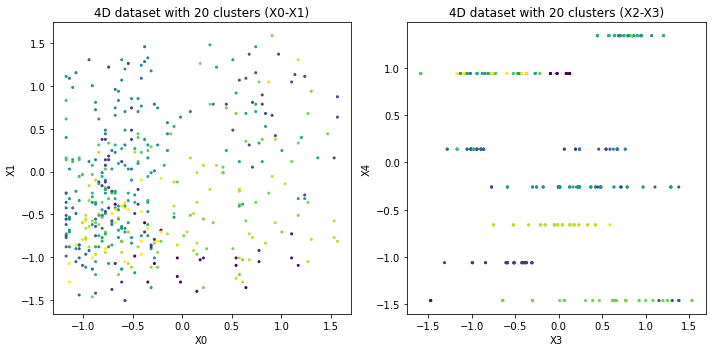

In [28]:
# 3D plots where color indicates cluster membership 

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_title('4D dataset with ' + str(n_clusters) + ' clusters (X0-X1)')
ax.scatter(core_data[:,0], core_data[:,1], s=4, c=gm_labels)
ax = fig.add_subplot(122)
ax.set_xlabel('X3')
ax.set_ylabel('X4')
ax.set_title('4D dataset with ' + str(n_clusters) + ' clusters (X2-X3)')
ax.scatter(core_data[:,2], core_data[:,3], s=4, c=gm_labels)
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'core_dataset_gm_clustered.png') 

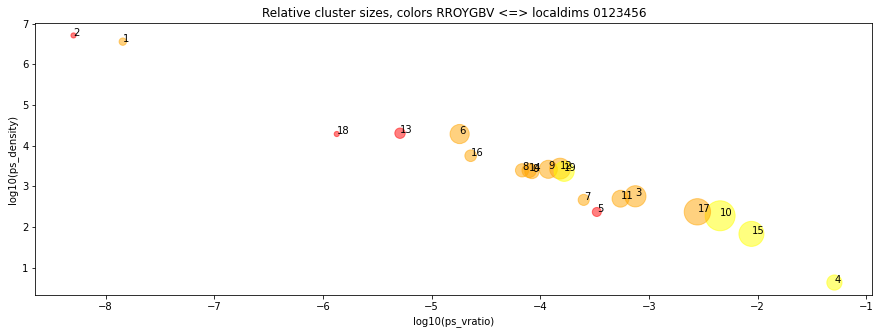

In [29]:
rcs.plot_cluster_pspheres(gm_spheres_df, 12, 'ps_vratio', 'ps_density')

## Refine the cluster set for the core data

### Tool to visualize clusters in the core dataset

In [30]:
# define display_cluster() function for widget
# change 'method' inside function and redefine to see different clustering methods
cols_to_keep = data.columns.tolist()
def display_cluster_2(cluster_id):
    method = 'gm'
    if method == 'km':
        ic_colors = np.where(km.labels_ == cluster_id, 'red', 'grey')
        ic_sizes = np.where(km.labels_ == cluster_id, 9, 1)
    else:
        ic_colors = np.where(gm_labels == cluster_id, 'red', 'grey')
        ic_sizes = np.where(gm_labels == cluster_id, 9, 1)
    fig = plt.figure(figsize=(10,4))
    ax = fig.add_subplot(121)
    ax.set_xlabel(cols_to_keep[0])
    ax.set_ylabel(cols_to_keep[1])
    ax.set_title('Cluster '+str(cluster_id))
    ax.scatter(core_data[:,0],core_data[:,1], s=ic_sizes,
              c=ic_colors)
    ax = fig.add_subplot(122)
    ax.set_xlabel(cols_to_keep[2])
    ax.set_ylabel(cols_to_keep[3])
    ax.set_title('Method = '+method)
    ax.scatter(core_data[:,2],core_data[:,3], s=ic_sizes,
              c=ic_colors)
    fig.tight_layout()
    plt.show()
    return

In [31]:
inbox = widgets.BoundedIntText(value=0, min=0, max=n_clusters-1, description='Cluster ID:')
ui = widgets.HBox([inbox])
# cluster_id is the name of an argument to f()
out = widgets.interactive_output(display_cluster_2, {'cluster_id': inbox})
display(ui,out);

Output()

### Apply splits and outliers

This section does not affect the data, but is retained to illustrate an important component of the workflow, that would normally be done by hand to make the clusters better represent the shape of the point cloud.

For example could automate splitting all clusters with ps_vratio > 0.1, but one of the daughter subclusters is usually still large and sparse so there is no obvious gain.

In [32]:
new_labels, new_centers = gm_labels, gm.means_
#new_labels, new_centers, success = rcs.split_cluster(core_data, new_labels, new_centers, 0, min_size=3, verbose=True)
#new_labels, new_centers, success = rcs.split_cluster(core_data, new_labels, new_centers, 13, min_size=3, verbose=True)
#new_labels, new_centers, success = rcs.split_cluster(core_data, new_labels, new_centers, 20, min_size=3, verbose=True)

print(new_centers.shape)

(20, 4)


In [33]:
spheres_df = rcs.describe_cluster_pspheres(core_data, new_labels, new_centers)
spheres_df

Note: ps_density, ps_volume, ps_vratio, and ps_to_hc are using p-cylinder volumes


,ndata,localdim,radius,ps_volume,ps_vratio,ps_density,hc_volume,hc_vratio,hc_density,ps_to_hc
cluster,,,,,,,,,,
0,15,2,0.874306,6.471668e-03,8.387702e-05,2.317795e+03,0.006909,8.953905e-05,2171.228480,0.936765
1,4,2,0.276126,1.110435e-06,1.439196e-08,3.602191e+06,0.000015,1.987947e-07,260784.634623,0.072396
2,2,1,0.283749,3.908637e-07,5.065848e-09,5.116873e+06,0.000006,7.144288e-08,362825.494208,0.070908
3,33,2,1.488821,5.793021e-02,7.508132e-04,5.696509e+02,0.016201,2.099693e-04,2036.971692,3.575824
4,17,3,1.338680,3.933286e+00,5.097794e-02,4.322086e+00,1.680894,2.178548e-02,10.113666,2.339997
5,6,1,1.668024,2.558695e-02,3.316235e-04,2.344945e+02,0.012898,1.671646e-04,465.193463,1.983814
6,27,2,0.681257,1.397911e-03,1.811784e-05,1.931453e+04,0.001921,2.489462e-05,14056.755252,0.727781
7,9,2,1.103284,1.937552e-02,2.511193e-04,4.645038e+02,0.016947,2.196449e-04,531.065581,1.143297
8,13,2,0.866804,5.250255e-03,6.804672e-05,2.476070e+03,0.006291,8.153959e-05,2066.339168,0.834524


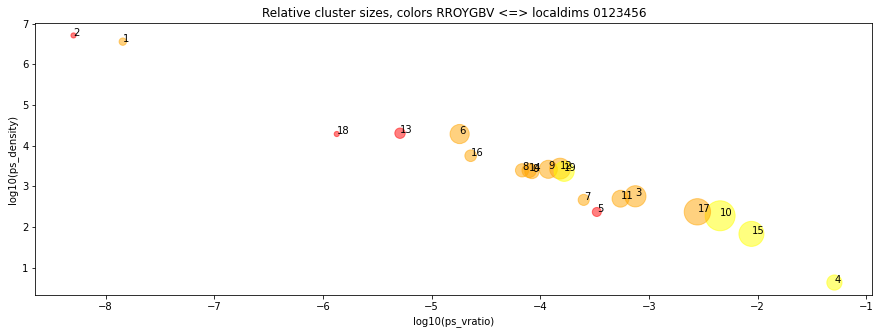

In [34]:
rcs.plot_cluster_pspheres(spheres_df, 9, 'ps_vratio', 'ps_density')

### Add outliers to OOD dataset

In [35]:
# Add outliers to extrap_data matrix
new_core_idx = np.where(new_labels != -1)[0]
outlier_idx = np.where(new_labels == -1)[0]
print(len(outlier_idx))
new_core_data = core_data[new_core_idx,:]
new_core_target = core_target[new_core_idx]
outlier_data = core_data[outlier_idx,:]
outlier_target = core_target[outlier_idx]
new_extrap_data = np.concatenate((extrap_data,outlier_data))
new_extrap_target = np.concatenate((extrap_target,outlier_target))
print(new_core_data.shape)
print(new_core_target.shape)
print(outlier_data.shape)
print(outlier_target.shape)
print(new_extrap_data.shape)
print(new_extrap_target.shape)

0
(431, 4)
(431,)
(0, 4)
(0,)
(194, 4)
(194,)


In [36]:
if write_outputs:
    np.savetxt(output_folder + figure_prefix + 'core_data.txt',new_core_data)
    np.savetxt(output_folder + figure_prefix + 'core_target.txt',new_core_target)
    np.savetxt(output_folder + figure_prefix + 'ood_data.txt', new_extrap_data)
    np.savetxt(output_folder + figure_prefix + 'ood_target.txt', new_extrap_target)

## Build and export the p-Sphere Hull

In [37]:
%%time

hull = psh.PSphereHull(core_data, new_labels, new_centers, compute_all=False)
hull.make_local_dimensions()
hull.make_pcylinders()

Wall time: 129 ms


Text(0, 0.5, 'Number of compact feature axes')

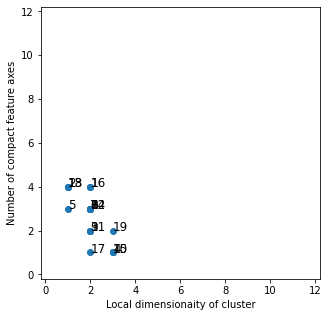

In [38]:
# For each sphere display local dimensionality and number of compact dimensions

labels = []
ldims = []
cdims = []
for sphere in hull.spheres:
    labels.append(sphere.label)
    ldims.append(sphere.localdim)
    cdim = len(np.where(sphere.compact_dims)[0])
    cdims.append(cdim)

fig = plt.figure(figsize=(5,5))
plt.scatter(ldims, cdims, s=36, marker='o')
for i, label in enumerate(labels):
    plt.text(ldims[i], cdims[i], label, fontsize=12)
plt.xlim((-0.2,12.2))
plt.ylim((-0.2,12.2))
plt.xlabel('Local dimensionaity of cluster')
plt.ylabel('Number of compact feature axes')

In [39]:
print('Feature minima in core dataset:')
print(hull.hc_min)
print('Feature maxima in core dataset:')
print(hull.hc_max)
print('Core dataset hypercube volume')
print(hull.hc_volume)

Feature minima in core dataset:
[-1.17281246 -1.50554692 -1.58623167 -1.46176383]
Feature maxima in core dataset:
[1.56549187 1.5888845  1.5334102  1.3431558 ]
Core dataset hypercube volume
74.14600173820537


In [40]:
%%time

hull.make_volume_ratios(1000)
print('Sum of p-cylinder volumes in units of hypercube volume:')
print(hull.naive_pcylinder_vratio)
print('Sampled volume ratio of hull:') 
print(hull.sampled_pcylinder_vratio, '+/-', hull.sampled_pcylinder_vratio_sigma)

Sum of p-cylinder volumes in units of hypercube volume:
0.07250094803662284
Sampled volume ratio of hull:
0.053 +/- 0.007280109889280518
Wall time: 1.29 s


In [41]:
%%time

# Note that the arguments values shown here are also their default values
mask = hull.flag_redundant_spheres(max_unique=0, use_pcylinders=True, reset_masks=True, apply_masks=True)

print('P-Spheres flagged as redundant:')
print(mask)

P-Spheres flagged as redundant:
[5]
Wall time: 1.13 s


In [42]:
# Sanity check: all remaining p-spheres have unique data points

print('Number of used spheres:', len([s for s in hull.spheres if s.used]))
for sphere in hull.spheres:
    if sphere.used:
        success, nunique = hull.sphere_is_redundant(sphere.label)
        print('id '+str(sphere.label)+':', nunique, end='; ')

Number of used spheres: 19
id 0: 15; id 1: 4; id 2: 2; id 3: 33; id 4: 15; id 6: 27; id 7: 8; id 8: 13; id 9: 16; id 10: 64; id 11: 19; id 12: 12; id 13: 7; id 14: 12; id 15: 46; id 16: 1; id 17: 51; id 18: 2; id 19: 27; 

In [43]:
%%time

hull.make_volume_ratios(1000)
print('Sum of p-cylinder volumes in units of hypercube volume:')
print(hull.naive_pcylinder_vratio)
print('Sampled volume ratio of hull:') 
print(hull.sampled_pcylinder_vratio, '+/-', hull.sampled_pcylinder_vratio_sigma)

Sum of p-cylinder volumes in units of hypercube volume:
0.07215585931727721
Sampled volume ratio of hull:
0.053 +/- 0.007280109889280518
Wall time: 1.63 s


In [44]:
print('Full dataset shape:', scaled_data.shape)
print('Core dataset shape:', core_data.shape)
print('Outside core dataset shape:', extrap_data.shape)

Full dataset shape: (625, 4)
Core dataset shape: (431, 4)
Outside core dataset shape: (194, 4)


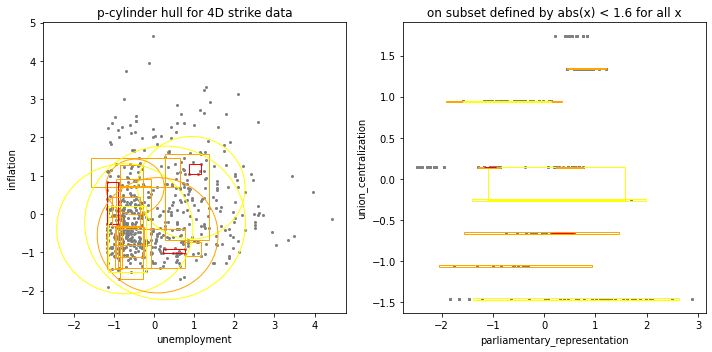

In [45]:
# Code to draw the hull in six 2D projections, using only non-redundant domains
fig = plt.figure(figsize=(15,5))
idx = [[0,1],[2,3]]
dim_map = {0: 'red', 1:'red', 2:'orange', 3:'yellow', 4:'green', 5:'blue', 6:'purple', 7:'black', 8:'black', 9:'black'}
clus_cols = [dim_map[i] for i in hull.localdims]
lims = list(zip(hull.hc_min, hull.hc_max))
only_hypercube = False

for iax in range(2):
    idx1 = idx[iax][0]
    idx2 = idx[iax][1]
    ax = fig.add_subplot(131 + iax)
    ax.set_xlabel(scaled_df.columns[idx1])
    ax.set_ylabel(scaled_df.columns[idx2])
    ax.scatter(scaled_data[:,idx1], scaled_data[:,idx2], s=4, c='grey')
    for k in range(hull.n_spheres):
        if hull.spheres[k].used:
            cyl, rect = rcs.pcylinder_patch(idx1, idx2, hull.spheres[k].center, hull.spheres[k].radius,
                                            hull.spheres[k].compact_dims, hull.spheres[k].compact_ranges,
                                            color=clus_cols[k])
            ax.add_patch(cyl)
            if (only_hypercube):
                ax.set_xlim(lims[idx1])
                ax.set_ylim(lims[idx2])
    if iax == 0:
        ax.set_title('p-cylinder hull for 4D strike data')
    if iax == 1:
        ax.set_title('on subset defined by abs(x) < ' + str(core_half_width) + ' for all x')

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + 'hull_projections.png')

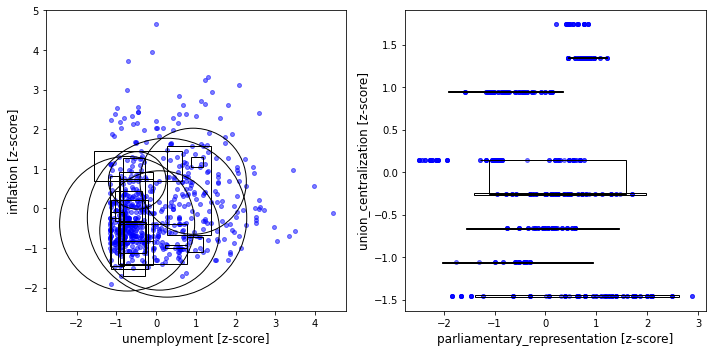

In [46]:
# A more readable version of the figure for the paper
fig = plt.figure(figsize=(10,5))
idx = [[0,1],[2,3]]
dim_map = {0: 'red', 1:'red', 2:'orange', 3:'yellow', 4:'green', 5:'blue', 6:'purple', 7:'black', 8:'black', 9:'black'}
clus_cols = [dim_map[i] for i in hull.localdims]
lims = list(zip(hull.hc_min, hull.hc_max))
only_hypercube = False

for iax in range(2):
    idx1 = idx[iax][0]
    idx2 = idx[iax][1]
    ax = fig.add_subplot(121 + iax)
    ax.set_xlabel(scaled_df.columns[idx1] + ' [z-score]', size=12)
    ax.set_ylabel(scaled_df.columns[idx2] + ' [z-score]', size=12)
    ax.scatter(scaled_data[:,idx1], scaled_data[:,idx2], s=16, c='blue', alpha=0.5)
    for k in range(hull.n_spheres):
        if hull.spheres[k].used:
            cyl, rect = rcs.pcylinder_patch(idx1, idx2, hull.spheres[k].center, hull.spheres[k].radius,
                                            hull.spheres[k].compact_dims, hull.spheres[k].compact_ranges,
#                                            color=clus_cols[k])
                                            color='black')
            ax.add_patch(cyl)
            if (only_hypercube):
                ax.set_xlim(lims[idx1])
                ax.set_ylim(lims[idx2])
#     if iax == 0:
#         ax.set_title('p-cylinder hull for 4D strike data')
#     if iax == 1:
#         ax.set_title('on subset defined by abs(x) < 1.5 for all x')

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + 'strike_hull_projections_paper.png')

In [47]:
import pickle
if write_outputs:
    with open(output_folder + figure_prefix + 'hull.pkl','wb') as f:
        pickle.dump(hull, f)
    f.close()

## Train regression model on core dataset


### Import and validate the core dataset and hull

In [48]:
if write_outputs:
    X = np.loadtxt(output_folder + figure_prefix + 'core_data.txt')
    y = np.loadtxt(output_folder + figure_prefix + 'core_target.txt')
    with open(output_folder + figure_prefix + 'hull.pkl','rb') as f:
        hull = pickle.load(f)
    f.close()
else:
    X = new_core_data
    y = new_core_target

print(X.shape, y.shape)
print(hull)

(431, 4) (431,)


In [49]:
# Sanity check that the core dataset is entirely contained in the hull

contains_result = hull.contains(X)
print(np.where(contains_result == False)[0])

[]


### Train a regression  model on core data 

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(344, 4) (87, 4) (344,) (87,)


In [51]:
# Check best number of estimators to avoid overfitting, = 30

# train_mae = []
# test_mae = []
# for nest in range(10,100,10):
#     print(nest, end=' ')
#     if regression_model == 'rf':
#         reg = RandomForestRegressor(n_estimators=nest, criterion='mae', n_jobs=3, random_state=random_seed)
#     else:
#         reg = GradientBoostingRegressor(n_estimators=nest, criterion='mae', random_state=random_seed)
#     reg.fit(X_train, y_train)
#     yp_train = reg.predict(X_train)
#     yp_test = reg.predict(X_test)
#     train_mae.append(np.mean(np.abs(yp_train - y_train)))
#     test_mae.append(np.mean(np.abs(yp_test - y_test)))

In [52]:
# plt.plot(list(range(10,100,10)), train_mae)
# plt.plot(list(range(10,100,10)), test_mae)

In [53]:
nest = 20
if regression_model == 'rf':
    reg = RandomForestRegressor(n_estimators=40, criterion='mae', n_jobs=3, random_state=random_seed)
else:
    reg = GradientBoostingRegressor(n_estimators=nest, criterion='mae', random_state=random_seed)  
reg.fit(X_train, y_train)
yp_train = reg.predict(X_train)
yp = reg.predict(X_test)

print('train MAE:', np.mean(np.abs(yp_train - y_train)))
print('test MAE:', np.mean(np.abs(yp - y_test)))

train MAE: 74.60196220930233
test MAE: 226.64669540229886


### Split OOD data into interpolation and extrapolation sets

Recall that "OOD" dataset might include some low-density/high-volume p-sphere subdomains and rejected outliers from other p-spheres. However, a significant fraction of the "OOD" data is still contained in the hull, since some of the p-spheres have large radii.

In [54]:
# OOD dataset contains data that were not used to define the hull
if write_outputs:
    X_ood = np.loadtxt(output_folder + figure_prefix + 'ood_data.txt')
    y_ood = np.loadtxt(output_folder + figure_prefix + 'ood_target.txt')
else:
    X_ood = new_extrap_data
    y_ood = new_extrap_target

print('OOD dataset shape', X_ood.shape)

OOD dataset shape (194, 4)


In [55]:
# Model predictions for the OOD dataset
yp_ood = reg.predict(X_ood)

In [56]:
%%time

# Extrapolation dataset contains only data that falls outside the hull (distance > 0)
distances = hull.psphere_distances(X_ood)
dist_from_hull = np.min(distances, axis=1)
ood_interp_idx = np.where(dist_from_hull == 0.0)[0]
print('Number of "OOD" data points inside p-sphere hull:', len(ood_interp_idx))
ood_extrap_idx = np.where(dist_from_hull != 0.0)[0]
print('Number of "OOD" data points outside p-sphere hull:', len(ood_extrap_idx))
y_interp = y_ood[ood_interp_idx]
yp_interp = yp_ood[ood_interp_idx]
y_extrap = y_ood[ood_extrap_idx]
yp_extrap = yp_ood[ood_extrap_idx]

Number of "OOD" data points inside p-sphere hull: 27
Number of "OOD" data points outside p-sphere hull: 167
Wall time: 308 ms


### Calculate error distributions and statistics

Core Dataset MAE: 226.64669540229886
OOD Interpolation MAE: 263.84444444444443
OOD Extrapolation MAE: 348.3141467065868


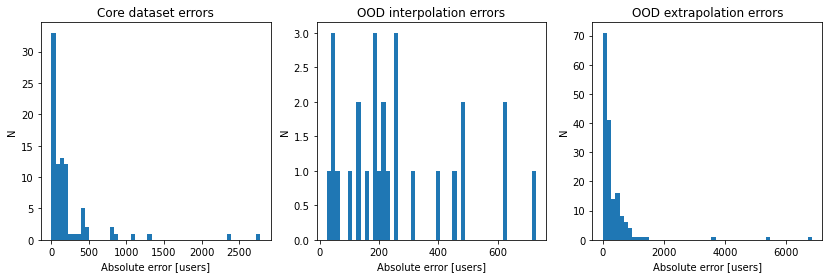

In [57]:
# Mean absolute error comparison

fig = plt.figure(figsize=(14,4))
ax1 = fig.add_subplot(131)
print('Core Dataset MAE:', np.mean(np.abs(yp - y_test)))
ax1.hist(np.abs(yp-y_test), bins=50);
ax1.set_xlabel('Absolute error [users]')
ax1.set_ylabel('N')
ax1.set_title('Core dataset errors')
ax2 = fig.add_subplot(132)
print('OOD Interpolation MAE:', np.mean(np.abs(yp_interp - y_interp)))
ax2.hist(np.abs(yp_interp - y_interp), bins=50);
ax2.set_xlabel('Absolute error [users]')
ax2.set_ylabel('N')
ax2.set_title('OOD interpolation errors');
ax3 = fig.add_subplot(133)
print('OOD Extrapolation MAE:', np.mean(np.abs(yp_extrap - y_extrap)))
ax3.hist(np.abs(yp_extrap - y_extrap), bins=50);
ax3.set_xlabel('Absolute error [users]')
ax3.set_ylabel('N')
ax3.set_title('OOD extrapolation errors');
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'MAE_plots.png')

In [58]:
# Mean relative error comparison is not meaningful because the target variable is often zero.

# print('Core Dataset MRE:', np.mean(np.abs(yp - y_test) / y_test))
# print('OOD Interpolation MRE:', np.mean(np.abs(yp_interp - y_interp) / y_interp))
# print('OOD Extrapolation MRE:', np.mean(np.abs(yp_extrap - y_extrap) / y_extrap))

# fig = plt.figure(figsize=(14,4))
# ax1 = fig.add_subplot(131)
# ax1.hist(np.abs(yp - y_test) / y_test, bins=50);
# ax1.set_xlabel('Relative error [users]')
# ax1.set_ylabel('N')
# ax1.set_title('Core dataset errors')

# ax2 = fig.add_subplot(132)
# ax2.hist(np.abs(yp_interp - y_interp) / y_interp, bins=50);
# ax2.set_xlabel('Relative error [users]')
# ax2.set_ylabel('N')
# ax2.set_title('OOD interpolation errors');

# ax3 = fig.add_subplot(133)
# ax3.hist(np.abs(yp_extrap - y_extrap) / y_extrap, bins=50);
# ax3.set_xlabel('Relative error [users]')
# ax3.set_ylabel('N')
# ax3.set_title('OOD extrapolation errors');
# if write_outputs:
#    fig.savefig(output_folder + figure_prefix + 'MRE_plots.png')

Plot extrapolation error versus different metrics that can be considered a proxy for extrapolation difficulty.

<ipython-input-59-f2a166ea2458>:3: RuntimeWarning: divide by zero encountered in true_divide
  extrap_relerr = np.abs(yp_extrap - y_extrap) / y_extrap


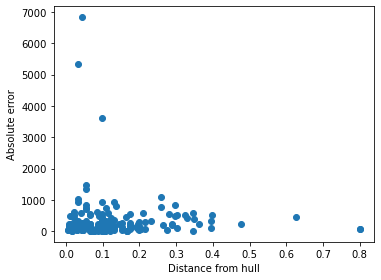

In [59]:
# OOD extrapolation error vs Euclidean distance from hull

extrap_relerr = np.abs(yp_extrap - y_extrap) / y_extrap
extrap_abserr = np.abs(yp_extrap - y_extrap)

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.scatter(dist_from_hull[ood_extrap_idx], extrap_abserr)
ax1.set_xlabel('Distance from hull')
ax1.set_ylabel('Absolute error')
# ax2 = fig.add_subplot(122)
# ax2.scatter(dist_from_hull[ood_extrap_idx], extrap_relerr)
# ax2.set_xlabel('Distance from hull')
# ax2.set_ylabel('Relative error')

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'extrapolation_error_vs_distance.png')

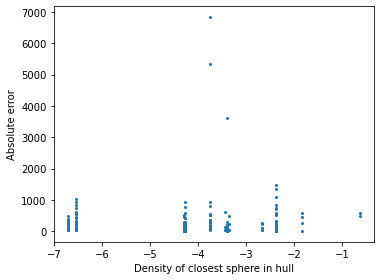

In [60]:
# OOD extrapolation error vs density of closest p-sphere

closest_sphere_labels = np.argmin(distances, axis=1)
sphere_densities = [s.pcylinder_vol / s.ndata for s in hull.spheres]
closest_sphere_densities = np.log10([sphere_densities[idx] for idx in closest_sphere_labels])

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.scatter(closest_sphere_densities[ood_extrap_idx], extrap_abserr, s=4)
ax1.set_xlabel('Density of closest sphere in hull')
ax1.set_ylabel('Absolute error')
# ax2 = fig.add_subplot(122)
# ax2.scatter(closest_sphere_densities[ood_extrap_idx], extrap_relerr, s=4)
# ax2.set_xlabel('Density of closest sphere in hull')
# ax2.set_ylabel('Relative error')

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'extrapolation_error_vs_density.png')

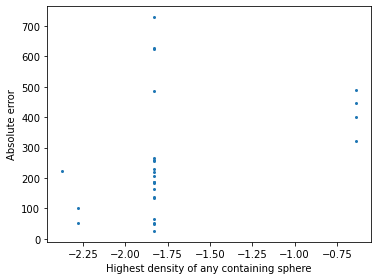

In [61]:
# OOD interpolation error vs highest density of all containing p-spheres

sphere_densities = [s.pcylinder_vol / s.ndata for s in hull.spheres]
interp_abserr = np.abs(yp_interp - y_interp) 
interp_relerr = np.abs(yp_interp - y_interp) / y_interp

highest_densities = []
for idx in ood_interp_idx:
    cids = list(hull.find_containing_spheres(X_ood[idx,:]))
    rhos = [sphere_densities[cid] for cid in cids]
    highest_densities.append(max(rhos))

fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.scatter(np.log10(highest_densities), interp_abserr, s=4)
ax1.set_xlabel('Highest density of any containing sphere')
ax1.set_ylabel('Absolute error')
# ax2 = fig.add_subplot(122)
# ax2.scatter(np.log10(highest_densities), interp_relerr, s=4)
# ax2.set_xlabel('Highest density of any containing sphere')
# ax2.set_ylabel('Relative error')

fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'interpolation_error_vs_density.png')

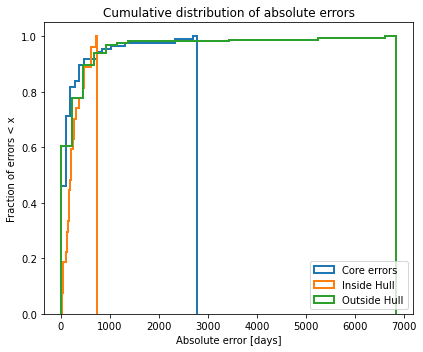

In [62]:
# View: overall cumulative distributions of in-domain and OOD errors
core_abserr = np.abs(yp - y_test) 
interp_abserr = np.abs(yp_interp - y_interp) 
extrap_abserr = np.abs(yp_extrap - y_extrap) 

#bins=np.linspace(0.0,0.6,101)
fig = plt.figure(figsize=(6,5))
ax1 = fig.add_subplot(111)
ax1.hist(core_abserr, cumulative=True, bins=30, histtype='step', lw=2, density=True, label='Core errors');
ax1.hist(interp_abserr, cumulative=True, bins=30, histtype='step', lw=2, density=True, label='Inside Hull');
ax1.hist(extrap_abserr, cumulative=True, bins=30, histtype='step', lw=2, density=True, label='Outside Hull');
ax1.set_title('Cumulative distribution of absolute errors')
ax1.set_xlabel('Absolute error [days]')
ax1.set_ylabel('Fraction of errors < x')
ax1.legend(loc='lower right')
fig.tight_layout()
if write_outputs:
    fig.savefig(output_folder + figure_prefix + 'cumdist_abserr.png')

In [63]:
# K-S tests

val, pval = ks_2samp(core_abserr, interp_abserr)
print('Core vs Interp K-S test:', val, pval)
val, pval = ks_2samp(core_abserr, extrap_abserr)
print('Core vs Extrap K-S test:', val, pval)
val, pval = ks_2samp(interp_abserr, extrap_abserr)
print('Interp vs Extrap K-S test:', val, pval)

Core vs Interp K-S test: 0.3793103448275862 0.0036102242103966953
Core vs Extrap K-S test: 0.23215637690136967 0.0033443195437142803
Interp vs Extrap K-S test: 0.19804834774894656 0.278657625973191
